In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/comp4211_pa1_data"

/content/drive/My Drive/comp4211_pa1_data


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# print(train.head())
print(train.shape)
# print(test.head())
print(test.shape)


(1001, 76)
(459, 76)


In [ ]:
# remove duplicate values
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
print(train.shape)
print(test.shape)
# train.info()
# test.info()

def fill_na(data):
  for col in data:
    if(data[col].dtype == np.object_):
      data[col].fillna("None", inplace = True)
    else:
      data[col].fillna(data[col].median(), inplace = True)
# fill na
fill_na(train)
fill_na(test)
print(train.shape)
print(test.shape)
# train.info()
# test.info()

# remove duplicate values (Just to make sure after filling na there won't be any duplicate values)
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

train_x = train.iloc[:, :-2]
train_y = train.iloc[:, -2:].to_numpy()
test_x = test.iloc[:, :-2]
test_y = test.iloc[:, -2:].to_numpy()
print(train_y[train_y[:,1]==1].shape)
print(train_y[train_y[:,1]==0].shape)

(1000, 76)
(459, 76)
(1000, 76)
(459, 76)
(389, 2)
(611, 2)


In [ ]:
# Q1
# one hot encoding 
concatenate_train_test = pd.concat([train_x,test_x])
print(concatenate_train_test.shape)

categorical_col = []
for col in concatenate_train_test:
  if(concatenate_train_test[col].dtype == np.object_):
    categorical_col.append(col)
concatenate_train_test = pd.get_dummies(data = concatenate_train_test, columns = categorical_col, drop_first = True)
print(concatenate_train_test.shape)
# print(concatenate_train_test.head())

train_x = concatenate_train_test.iloc[0:train_x.shape[0]]
test_x = concatenate_train_test.iloc[train_x.shape[0]:]

print(train_x.shape)
print(test_x.shape)
# print(train_x.head())

# scaling
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

(1459, 74)
(1459, 242)
(1000, 242)
(459, 242)


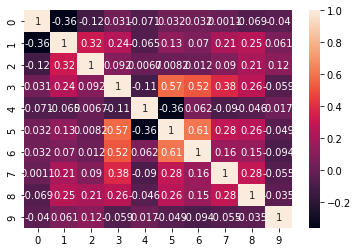

In [ ]:
# Q2 heatmap
sns.heatmap(pd.DataFrame(train_x[:,:10]).corr(), annot=True)

In [ ]:
# Q3
# Without Filter
model = LinearRegression().fit(train_x, train_y[:,0])
predict_y = model.predict(test_x)
original_r2 = r2_score(test_y[:,0],predict_y)
print("Original R2:", original_r2)

# Linear Regression Filter
model = SelectFromModel(estimator=LinearRegression()).fit(train_x, np.log(train_y[:,0].astype(np.float32)))
# print(model.estimator_.coef_)
linear_filter = model.get_support()
model = LinearRegression().fit(train_x[:,linear_filter], train_y[:,0])
predict_y = model.predict(test_x[:,linear_filter])
linear_r2 = r2_score(test_y[:,0],predict_y)
print("Linear Regression Filter R2:", linear_r2)

# LASSO Filter
model = SelectFromModel(estimator = Lasso(alpha=0.005, random_state=4211)).fit(train_x,np.log(train_y[:,0].astype(np.float32)))
Lasso_filter = model.get_support()
model = LinearRegression().fit(train_x[:,Lasso_filter], train_y[:,0])
predict_y = model.predict(test_x[:,Lasso_filter])
Lasso_r2 = r2_score(test_y[:,0],predict_y)
print("Lasso Filter R2:",Lasso_r2)

filter = linear_filter
if(linear_r2 < Lasso_r2):
  filter = Lasso_filter
print(train_x[:,linear_filter].shape, train_x[:,Lasso_filter].shape,Lasso_filter.shape)

Original R2: -9.263941878670098e+21
Linear Regression Filter R2: 0.6920336173760882
Lasso Filter R2: 0.8857060188795041
(1000, 25) (1000, 93) (242,)


In [ ]:
# Q4
train_x, validate_x, train_y, validate_y = train_test_split(train_x,train_y, test_size=0.2, random_state=4211)

train_LotArea_x = train_x[:,concatenate_train_test.columns.get_loc("LotArea")]
train_GrLivArea_x = train_x[:,concatenate_train_test.columns.get_loc("GrLivArea")]
train_OverallQual_x = train_x[:,concatenate_train_test.columns.get_loc("OverallQual")]
train_OverallCond_x = train_x[:,concatenate_train_test.columns.get_loc("OverallCond")]
validate_LotArea_x = validate_x[:,concatenate_train_test.columns.get_loc("LotArea")]
validate_GrLivArea_x = validate_x[:,concatenate_train_test.columns.get_loc("GrLivArea")]
validate_OverallQual_x = validate_x[:,concatenate_train_test.columns.get_loc("OverallQual")]
validate_OverallCond_x = validate_x[:,concatenate_train_test.columns.get_loc("OverallCond")]

In [ ]:
print(train_LotArea_x.shape)
print(validate_LotArea_x.shape)
print(train_x.shape,train_y.shape)
print(validate_x.shape,validate_y.shape)

(800,)
(200,)
(800, 242) (800, 2)
(200, 242) (200, 2)


In [ ]:
# Q4 (continued)
# LotArea
model1 = LinearRegression().fit(train_LotArea_x[:,np.newaxis], train_y[:,0])
predict_y = model1.predict(validate_LotArea_x[:,np.newaxis])
LotArea_r2 = r2_score(validate_y[:,0],predict_y)
print("model1(LotArea) R2:", LotArea_r2)

# GrLivArea 
model2 = LinearRegression().fit(train_GrLivArea_x[:,np.newaxis], train_y[:,0])
predict_y = model2.predict(validate_GrLivArea_x[:,np.newaxis])
GrLivArea_r2 = r2_score(validate_y[:,0],predict_y)
print("model2(GrLivArea) R2:", GrLivArea_r2)

# OverallQual 
model3 = LinearRegression().fit(train_OverallQual_x[:,np.newaxis], train_y[:,0])
predict_y = model3.predict(validate_OverallQual_x[:,np.newaxis])
OverallQual_r2 = r2_score(validate_y[:,0],predict_y)
print("model3(OverallQual) R2:", OverallQual_r2)

# OverallCond 
model4 = LinearRegression().fit(train_OverallCond_x[:,np.newaxis], train_y[:,0])
predict_y = model4.predict(validate_OverallCond_x[:,np.newaxis])
OverallCond_r2 = r2_score(validate_y[:,0],predict_y)
print("model4(OverallCond) R2:", OverallCond_r2)

# Selected Features From Part2
model5 = LinearRegression().fit(train_x[:,filter], train_y[:,0])
predict_y = model5.predict(validate_x[:,filter])
SelectedFeatures_r2 = r2_score(validate_y[:,0],predict_y)
print("model5(Selected Features) R2:", SelectedFeatures_r2)
# print(predict_y[:10])
# print(validate_y[:10,0])

model1(LotArea) R2: 0.02053447599941216
model2(GrLivArea) R2: 0.3926843861046172
model3(OverallQual) R2: 0.5869504375679955
model4(OverallCond) R2: 0.017107462820201147
model5(Selected Features) R2: 0.6871749248989527


Text(0.5, 1.0, 'SalePrice vs OverallCond\n(R^2 = 0.02)')

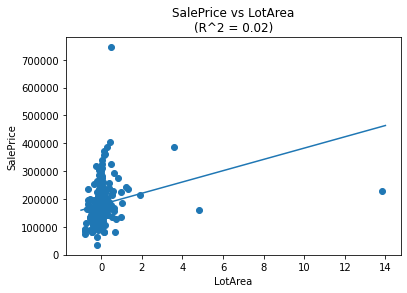

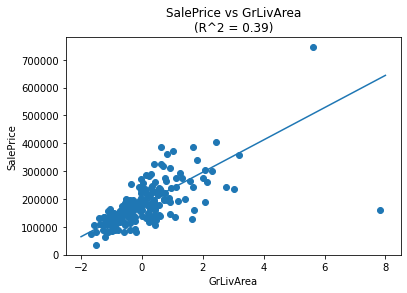

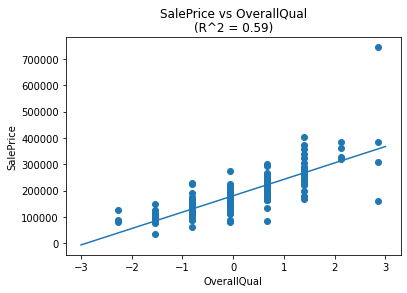

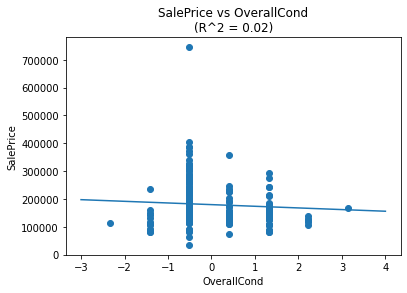

In [ ]:
# Q5
# LotArea Plot
xfit = np.linspace(validate_LotArea_x.astype(np.int64).min()-1, validate_LotArea_x.astype(np.int64).max()+1, 1000)
yfit = model1.predict(xfit[:, np.newaxis])
plt.figure(0)
plt.scatter(validate_LotArea_x, validate_y[:,0])
plt.plot(xfit, yfit)
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.title("SalePrice vs LotArea\n(R^2 = " + str(round(LotArea_r2,2)) + ")")

# GrLivArea
xfit = np.linspace(validate_GrLivArea_x.astype(np.int64).min()-1, validate_GrLivArea_x.astype(np.int64).max()+1, 1000)
yfit = model2.predict(xfit[:, np.newaxis])
plt.figure(1)
plt.scatter(validate_GrLivArea_x, validate_y[:,0])
plt.plot(xfit, yfit)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("SalePrice vs GrLivArea\n(R^2 = " + str(round(GrLivArea_r2,2)) + ")")

# OverallQual
xfit = np.linspace(validate_OverallQual_x.astype(np.int64).min()-1, validate_OverallQual_x.astype(np.int64).max()+1, 1000)
yfit = model3.predict(xfit[:, np.newaxis])
plt.figure(2)
plt.scatter(validate_OverallQual_x, validate_y[:,0])
plt.plot(xfit, yfit)
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("SalePrice vs OverallQual\n(R^2 = " + str(round(OverallQual_r2,2)) + ")")

# OverallCond
xfit = np.linspace(validate_OverallCond_x.astype(np.int64).min()-1, validate_OverallCond_x.astype(np.int64).max()+1, 1000)
yfit = model4.predict(xfit[:, np.newaxis])
plt.figure(3)
plt.scatter(validate_OverallCond_x, validate_y[:,0])
plt.plot(xfit, yfit)
plt.xlabel("OverallCond")
plt.ylabel("SalePrice")
plt.title("SalePrice vs OverallCond\n(R^2 = " + str(round(OverallCond_r2,2)) + ")")

Training time for Linear Regression Model: 0.018683671951293945
R2 for Linear Regression Model: 0.6871749248989527
H:1
mean training time, R2:[ 0.19034664 -5.22640914]
sd training time, R2:[2.18520979e-02 7.23523891e-05]
Training score:-5.11646968052431
Validating score:-5.22630958282705
H:2
mean training time, R2:[ 0.14834976 -5.22650809]
sd training time, R2:[2.85288649e-02 5.40896775e-05]
Training score:-5.116672699628954
Validating score:-5.226515450816935
H:4
mean training time, R2:[ 0.10323707 -5.22646088]
sd training time, R2:[8.13253694e-03 7.18455161e-05]
Training score:-5.116668792018894
Validating score:-5.226511651816781
H:8
mean training time, R2:[ 0.17401632 -5.22636897]
sd training time, R2:[0.06634212 0.00015394]
Training score:-5.116330953665554
Validating score:-5.226162350811532
H:16
mean training time, R2:[ 0.27968001 -5.22638205]
sd training time, R2:[1.27405546e-02 7.12442775e-05]
Training score:-5.116600744028595
Validating score:-5.226442783084636
H:32
mean trai

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


H:128
mean training time, R2:[ 2.64519366 -1.26797534]
sd training time, R2:[1.85090711 2.77575823]
Training score:0.8685800807592616
Validating score:0.6759476101399273


Text(0.5, 1.0, 'H vs R^2')

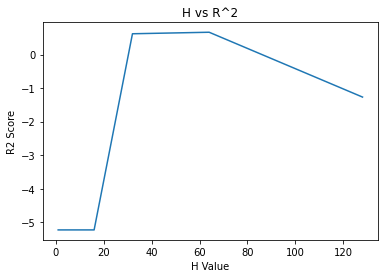

In [ ]:
# Q6
# Linear Regression Model
begin = time.time()
model = LinearRegression().fit(train_x[:,filter], train_y[:,0])
end = time.time()
predict_y = model5.predict(validate_x[:,filter])
r2 = r2_score(validate_y[:,0],predict_y)

print("Training time for Linear Regression Model:",str(end-begin))
print("R2 for Linear Regression Model:", r2)


# Neutral Network
H = [1,2,4,8,16,32,64,128]
r2_scores = np.empty((len(H)), dtype="float64")

for i in range(len(H)):
  results_i = np.empty((3,2), dtype="float64")
  
  for j in range(3):
    model = MLPRegressor(hidden_layer_sizes=(H[i],H[i],H[i],H[i],H[i],H[i]), max_iter=500, early_stopping=True, random_state=j+1)
    begin = time.time()
    model.fit(train_x[:,filter],train_y[:,0])
    end = time.time()
    predict_y = model.predict(validate_x[:,filter])
    r2 = r2_score(validate_y[:,0],predict_y)
    results_i[j] = np.array([end-begin, r2])
  
  print("H:" + str(H[i]))
  # print(results_i)
  print("mean training time, R2:" + str(results_i.mean(axis=0)))
  print("sd training time, R2:" + str(results_i.std(axis=0)))
  print("Training score:" + str(model.score(train_x[:,filter], train_y[:,0])))
  print("Validating score:" + str(model.score(validate_x[:,filter], validate_y[:,0])))
  r2_scores[i] = results_i.mean(axis=0)[1]


plt.figure(4)
plt.plot(H, r2_scores)
plt.xlabel("H Value")
plt.ylabel("R2 Score")
plt.title("H vs R^2")

# Q7-8 are in the report

In [ ]:
# Q9
results = np.empty((3,3), dtype="float64")

for i in range(3):
  model = SGDClassifier(loss="log", penalty="l2", eta0=0.01, learning_rate="adaptive", random_state=i+1)
  begin = time.time()
  model.fit(train_x[:,filter],train_y[:,1])
  end = time.time()
  predict_y = model.predict(validate_x[:,filter])
  accuracy = accuracy_score(validate_y[:,1], predict_y)
  F1 = f1_score(validate_y[:,1], predict_y, average="binary")
  results[i] = np.array([end-begin, accuracy, F1])

print(results)
print("mean training time, accuracy, F1:" + str(results.mean(axis=0)))
print("sd training time, accuracy, F1:" + str(results.std(axis=0)))


[[0.02803349 0.95       0.9382716 ]
 [0.02726722 0.945      0.93251534]
 [0.02666712 0.94       0.92592593]]
mean training time, accuracy, F1:[0.02732261 0.945      0.93223762]
sd training time, accuracy, F1:[0.00055919 0.00408248 0.00504393]


True Positive:75
True Negative:113
False Positve:7
False Negative:5


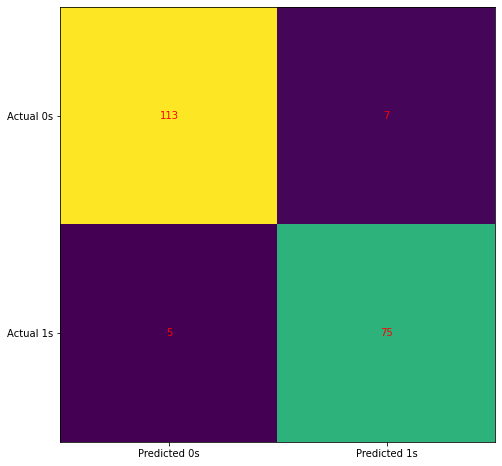

In [ ]:
# Q10
def draw_confusion_matrix(cm):

  tn, fp, fn, tp = cm.ravel()
  print("True Positive:" + str(tp))
  print("True Negative:" + str(tn))
  print("False Positve:" + str(fp))
  print("False Negative:" + str(fn))

  fig, ax = plt.subplots(figsize=(8, 8))
  ax.imshow(cm)
  ax.grid(False)
  ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
  ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
  ax.set_ylim(1.5, -0.5)
  for i in range(2):
      for j in range(2):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='red')


  plt.show()

cm = confusion_matrix(validate_y[:,1], predict_y)
draw_confusion_matrix(cm)

H:1
mean training time, F1, accuracy:[0.06467136 0.19047619 0.53333333]
sd training time, F1, accuracy:[0.00733885 0.26937401 0.0942809 ]
Training score:0.61375
Validating score:0.6
H:2
mean training time, F1, accuracy:[0.05703926 0.19047619 0.53333333]
sd training time, F1, accuracy:[0.00986677 0.26937401 0.0942809 ]
Training score:0.61375
Validating score:0.6
H:4
mean training time, F1, accuracy:[0.05156255 0.19047619 0.53333333]
sd training time, F1, accuracy:[0.00424196 0.26937401 0.0942809 ]
Training score:0.61375
Validating score:0.6
H:8
mean training time, F1, accuracy:[0.19955659 0.85345887 0.87666667]
sd training time, F1, accuracy:[0.035884   0.01214577 0.01312335]
Training score:0.9275
Validating score:0.87
H:16
mean training time, F1, accuracy:[0.22218959 0.86296844 0.88833333]
sd training time, F1, accuracy:[0.03494105 0.02042316 0.01649916]
Training score:0.91625
Validating score:0.885
H:32
mean training time, F1, accuracy:[0.20170323 0.80525159 0.85166667]
sd training ti

Text(0.5, 1.0, 'H vs Accuracy')

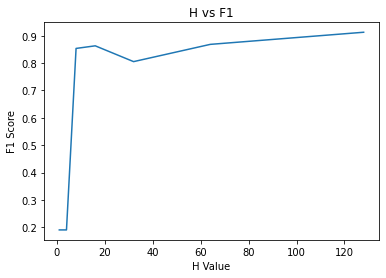

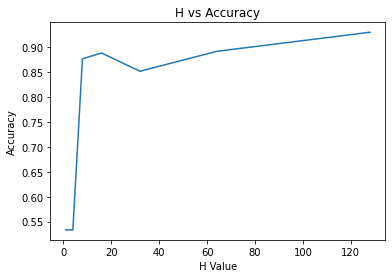

In [ ]:
# Q11
H = [1,2,4,8,16,32,64,128]
F1_scores = np.empty((len(H)), dtype="float64")
accuracy_array = np.empty((len(H)), dtype="float64")

for i in range(len(H)):
  results_i = np.empty((3,3), dtype="float64")
  
  for j in range(3):
    model = MLPClassifier(hidden_layer_sizes=(H[i],H[i],H[i]), max_iter=500, early_stopping=True, random_state=j+1)
    begin = time.time()
    model.fit(train_x[:,filter],train_y[:,1])
    end = time.time()
    predict_y = model.predict(validate_x[:,filter])
    F1 = f1_score(validate_y[:,1],predict_y,average="binary")
    accuracy = accuracy_score(validate_y[:,1], predict_y)
    results_i[j] = np.array([end-begin, F1, accuracy])
  
  print("H:" + str(H[i]))
  # print(results_i)
  print("mean training time, F1, accuracy:" + str(results_i.mean(axis=0)))
  print("sd training time, F1, accuracy:" + str(results_i.std(axis=0)))
  print("Training score:" + str(model.score(train_x[:,filter], train_y[:,1])))
  print("Validating score:" + str(model.score(validate_x[:,filter], validate_y[:,1])))
  F1_scores[i] = results_i.mean(axis=0)[1]
  accuracy_array[i] = results_i.mean(axis=0)[2]

# Q12
plt.figure(5)
plt.plot(H, F1_scores)
plt.xlabel("H Value")
plt.ylabel("F1 Score")
plt.title("H vs F1")

plt.figure(6)
plt.plot(H, accuracy_array)
plt.xlabel("H Value")
plt.ylabel("Accuracy")
plt.title("H vs Accuracy")

# Q13-14 are in the report

In [ ]:
# combine the training and validation set
train_x = np.concatenate((train_x, validate_x), axis=0)
train_y = np.concatenate((train_y, validate_y), axis=0)
print(train_x.shape)

(1000, 242)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END early_stopping=True, hidden_layer_sizes=(4, 4, 4), learning_rate_init=0.1, max_iter=500, random_state=4211;, score=0.885 total time=   0.1s
[CV 2/5] END early_stopping=True, hidden_layer_sizes=(4, 4, 4), learning_rate_init=0.1, max_iter=500, random_state=4211;, score=0.930 total time=   0.1s
[CV 3/5] END early_stopping=True, hidden_layer_sizes=(4, 4, 4), learning_rate_init=0.1, max_iter=500, random_state=4211;, score=0.925 total time=   0.1s
[CV 4/5] END early_stopping=True, hidden_layer_sizes=(4, 4, 4), learning_rate_init=0.1, max_iter=500, random_state=4211;, score=0.915 total time=   0.1s
[CV 5/5] END early_stopping=True, hidden_layer_sizes=(4, 4, 4), learning_rate_init=0.1, max_iter=500, random_state=4211;, score=0.925 total time=   0.1s
[CV 1/5] END early_stopping=True, hidden_layer_sizes=(4, 4, 4), learning_rate_init=0.001, max_iter=500, random_state=4211;, score=0.590 total time=   0.1s
[CV 2/5] END early_

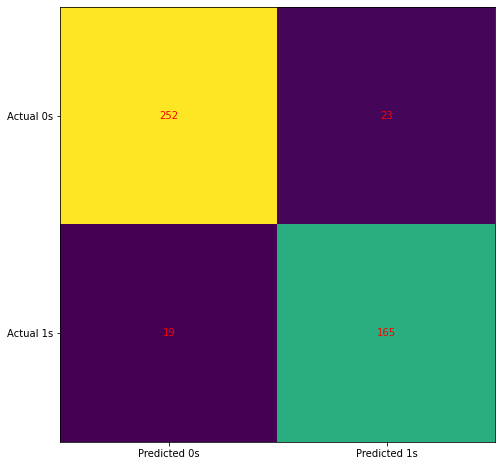

In [ ]:
# Q15
hidden_layer_sizes = [(4,4,4),(8,8,8),(16,16,16),(32,32,32),(64,64,64)]
learning_rate_init = [0.1,0.001]
max_iter = [500]
random_state = [4211]
early_stopping = [True]
hyperparameters = dict(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init, max_iter=max_iter, random_state=random_state, early_stopping=early_stopping)

best_model = GridSearchCV(MLPClassifier(), hyperparameters, cv=KFold(5, shuffle=True, random_state=4211), verbose=3)
best_model = best_model.fit(train_x[:,filter],train_y[:,1])

# Q16
# Report accuracy as well as the mean and standard deviation of the validation accuracy of the five random data splits for each hyper-parameter setting.
print(best_model.cv_results_)

best_params_ = best_model.best_params_
print(best_params_)
print(best_model.best_score_)

# Q17
# Testing with Best Model
best_model = MLPClassifier(**best_params_).fit(train_x[:,filter], train_y[:,1])
predict_y = best_model.predict(test_x[:,filter])
F1 = f1_score(test_y[:,1],predict_y,average="binary")
accuracy = accuracy_score(test_y[:,1], predict_y)

print("F1 Score for Testing Set:" + str(F1))
print("Accuracy for Testing Set:" + str(accuracy))

# Confusion Matrix 
cm = confusion_matrix(test_y[:,1], predict_y)
draw_confusion_matrix(cm)